This code plots snapshots of the movie, showing the state of degradation
and distribution of tPA at prescribed times. 

Code was called "macro_fig_single.m" in Utah.

In [1]:
close all
clear all

In [2]:
expCode = '2022-12-20-1600';
fileCode = 'tPA425_PLG2_tPA01_into_and_along_Q2.dat';
folder = strcat('../../data/', expCode);

In [3]:
isBinary = 1;
%  arch = input(' type <sun> for sun and <lin> for linux ')
  arch = 'lin'
  if (isBinary ~= 0 & isBinary ~=1)
    disp('Problem with isBinary')
    pause
  end;
  iflag = 0;
  binaryformat='native';
  if arch == 'sun',
     binaryformat = 'ieee-be'
  else 
     binaryformat = 'ieee-le'    
  end;

arch = lin
binaryformat = ieee-le


In [4]:
N=93; %35
F=121;%41;%36;;
% Ffree=7;%7;%2;
% stats=1;
M=43074;%14528;%2422;
num=(2*N-1)*F+N*(F-1);
%tf=30*60;

In [5]:
% Find and replace all the file name endings to correspond to the names you
% used in the macroscale model. There should be 17 names that change.

% DON'T DO THIS ANY MORE.
% Just change the "fileCode" variable above

% ("lowPLG_tPA018_coarse.dat")
fids(1) = fopen(strcat(folder, '/X1plot_', fileCode), 'r', binaryformat);
X1plotc = fread(fids(1),[2,F*(N-1)],'int');
fclose(fids(1));

fids(2) = fopen(strcat(folder, '/X2plot_', fileCode),'r',binaryformat);
X2plotc = fread(fids(2),[2,N*(F-1)],'int');
fclose(fids(2));

fids(3) = fopen(strcat(folder, '/Y1plot_', fileCode),'r',binaryformat);
Y1plotc = fread(fids(3),[2,F*(N-1)],'int');
fclose(fids(3));

fids(4) = fopen(strcat(folder, '/Y2plot_', fileCode),'r',binaryformat);
Y2plotc = fread(fids(4),[2,N*(F-1)],'int');
fclose(fids(4));

fids(5) = fopen(strcat(folder, '/Xvplot_', fileCode),'r',binaryformat);
tempc = fread(fids(5),inf,'int');
npltc=length(tempc)/(F*N);
fclose(fids(5));

fids(5) = fopen(strcat(folder, '/Xvplot_', fileCode),'r',binaryformat);
Xvplotc = fread(fids(5),N*F,'int');
fclose(fids(5));

fids(6) = fopen(strcat(folder, '/Yvplot_', fileCode),'r',binaryformat);
Yvplotc = fread(fids(6),N*F,'int');
fclose(fids(6));

fids(7) = fopen(strcat(folder, '/tPAbd_', fileCode),'r',binaryformat);
bdtPAc = fread(fids(7),[2,M],'double');
fclose(fids(7));

fids(8) = fopen(strcat(folder, '/tPAfree_', fileCode),'r',binaryformat);
freetPAc = fread(fids(8),[2,M],'double');
fclose(fids(8));

% fids(9) = fopen('degnext_tPA425_PLG2_tPA01_Kd0236_into_and_along_Q2.dat','r',binaryformat);
 %fids(10) = fopen('Vedgenext_tPA425_PLG2_tPA01_Kd0236_into_and_along_Q2.dat','r',binaryformat);
% fids(11) = fopen('Vbdnext_tPA425_PLG2_tPA01_Kd0236_into_and_along_Q2.dat','r',binaryformat);
% 
%     degnext = fread(fids(9),[tf+1,num],'double');
     %Vedgenext = fread(fids(10),[tf+1,M],'int');
%     Vbdnext = fread(fids(11),[tf+1,M],'int');

In [ ]:
%First set up the initial condition

for i=1:2
    for j=1:M
        if freetPA(i,j)==-1
            freetPA(i,j)=NaN;
        end
        if bdtPA(i,j)==-1
            bdtPA(i,j)=NaN;
        end
    end
end

X1tot(1)=X1plot(1,1);
X1tot(2)=X1plot(2,1);
X1tot(3)=NaN;
Y1tot(1)=Y1plot(1,1);
Y1tot(2)=Y1plot(2,1);
Y1tot(3)=NaN;
for i=1:F*(N-1)-1
    X1tot(1+3*i)=X1plot(1,i+1);
    X1tot(2+3*i)=X1plot(2,i+1);
    X1tot(3+3*i)=NaN;
    Y1tot(1+3*i)=Y1plot(1,i+1);
    Y1tot(2+3*i)=Y1plot(2,i+1);
    Y1tot(3+3*i)=NaN;
end
X2tot(1)=X2plot(1,1);
X2tot(2)=X2plot(2,1);
X2tot(3)=NaN;
Y2tot(1)=Y2plot(1,1);
Y2tot(2)=Y2plot(2,1);
Y2tot(3)=NaN;
for i=1:N*(F-1)-1
    X2tot(1+3*i)=X2plot(1,i+1);
    X2tot(2+3*i)=X2plot(2,i+1);
    X2tot(3+3*i)=NaN;
    Y2tot(1+3*i)=Y2plot(1,i+1);
    Y2tot(2+3*i)=Y2plot(2,i+1);
    Y2tot(3+3*i)=NaN;
end

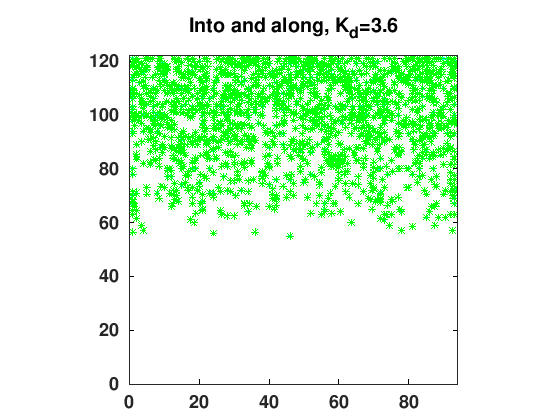

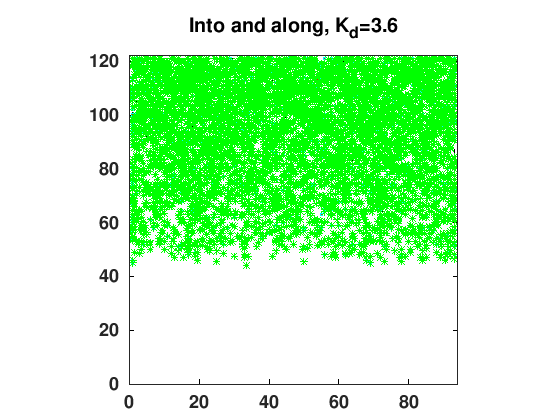

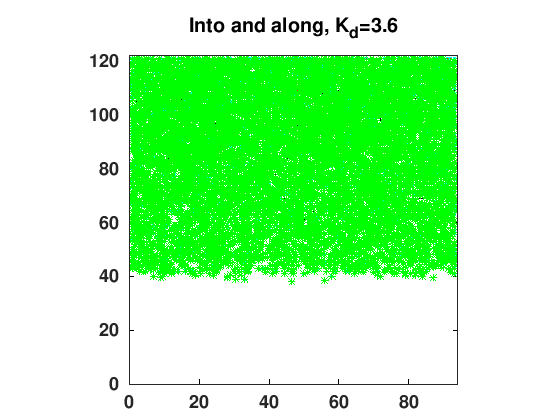

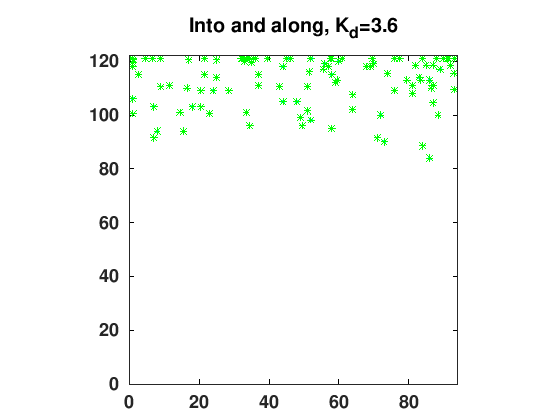

In [8]:
fids(1) = fopen(strcat(folder, '/X1plot_', fileCode),'r',binaryformat);
fids(2) = fopen(strcat(folder, '/X2plot_', fileCode),'r',binaryformat);
fids(3) = fopen(strcat(folder, '/Y1plot_', fileCode),'r',binaryformat);
fids(4) = fopen(strcat(folder, '/Y2plot_', fileCode),'r',binaryformat);
fids(5) = fopen(strcat(folder, '/Xvplot_', fileCode),'r',binaryformat);
fids(6) = fopen(strcat(folder, '/Yvplot_', fileCode),'r',binaryformat);
fids(7) = fopen(strcat(folder, '/tPAbd_', fileCode),'r',binaryformat);
fids(8) = fopen(strcat(folder, '/tPAfree_', fileCode),'r',binaryformat);

%now find the state of the clot at all subsequent times (each minute)
for iplt=2:npltc
    X1plot = fread(fids(1),[2,F*(N-1)],'int');
    X2plot = fread(fids(2),[2,N*(F-1)],'int');
    Y1plot = fread(fids(3),[2,F*(N-1)],'int');
    Y2plot = fread(fids(4),[2,N*(F-1)],'int');
    Xvplot = fread(fids(5),N*F,'int');
    Yvplot = fread(fids(6),N*F,'int');
    bdtPA = fread(fids(7),[2,M],'double');
    freetPA = fread(fids(8),[2,M],'double');
    
    for i=1:2
        for j=1:M
            if freetPA(i,j)==-1
                freetPA(i,j)=NaN;
            end
            if bdtPA(i,j)==-1
                bdtPA(i,j)=NaN;
            end
        end
    end
    
    X1tot(1)=X1plot(1,1);
    X1tot(2)=X1plot(2,1);
    X1tot(3)=NaN;
    Y1tot(1)=Y1plot(1,1);
    Y1tot(2)=Y1plot(2,1);
    Y1tot(3)=NaN;
    for i=1:F*(N-1)-1
        X1tot(1+3*i)=X1plot(1,i+1);
        X1tot(2+3*i)=X1plot(2,i+1);
        X1tot(3+3*i)=NaN;
        Y1tot(1+3*i)=Y1plot(1,i+1);
        Y1tot(2+3*i)=Y1plot(2,i+1);
        Y1tot(3+3*i)=NaN;
    end
    X2tot(1)=X2plot(1,1);
    X2tot(2)=X2plot(2,1);
    X2tot(3)=NaN;
    Y2tot(1)=Y2plot(1,1);
    Y2tot(2)=Y2plot(2,1);
    Y2tot(3)=NaN;
    for i=1:N*(F-1)-1
        X2tot(1+3*i)=X2plot(1,i+1);
        X2tot(2+3*i)=X2plot(2,i+1);
        X2tot(3+3*i)=NaN;
        Y2tot(1+3*i)=Y2plot(1,i+1);
        Y2tot(2+3*i)=Y2plot(2,i+1);
        Y2tot(3+3*i)=NaN;
    end
       
    %if(iplt==2||iplt==3||iplt==4||iplt==7)
    if(iplt==6||iplt==7||iplt==8||iplt==9)
    figure
    plot(X1tot,Y1tot,'k','LineWidth',2)
    axis([0 (N+1) 0 (F+1)])
    hold on
    plot(X2tot,Y2tot,'k','LineWidth',2)
    plot(Xvplot,Yvplot,'cs','MarkerFaceColor','r','MarkerSize',2)
    plot(0,0,'ws','MarkerFaceColor','c','MarkerSize',2) %gets rid of the red square at (0,0) that was just an artifact anyway
    plot(bdtPA(1,:),bdtPA(2,:),'g*')
    %plot(freetPA(1,:),freetPA(2,:),'k*')
    set(gca,'FontSize',18,'FontWeight','b')
    title('Into and along, K_d=3.6')
    axis square
    hold off
    end
    
        
end


fclose(fids(1));
fclose(fids(2));
fclose(fids(3));
fclose(fids(4));
fclose(fids(5));
fclose(fids(6));
fclose(fids(7));
fclose(fids(8));